**Name:Islam,M.M.Sabbir**

**ID: 18-37311-1**

# Load Necessary Packages

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load Mnist Dataset

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


11493376/11490434 [==============================] - 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


# Display Images

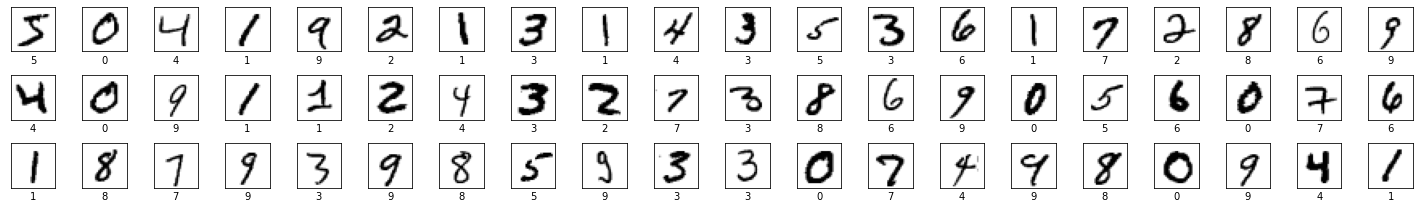

In [5]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

#Data Normalization

In [6]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
x_train, x_test = x_train / 255.0, x_test / 255.0 

# Analyze the affect of using and not using data normalization 



The data will be one dimension without normalization.So,the model will show error and not show the output correctly.With normalization the value will be between 0 to 1.Thats why the outputs are in float and points.Sometimes we need to apply normalization in the dataset.

# Build the Model

In [7]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(28,28) output->(24,24)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

# Compile the Model:Choose any of these optimizer

In [8]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

**SGD**

In [ ]:
# model.compile(
#     optimizer='SGD', 
#     loss='sparse_categorical_crossentropy', 
#     metrics=['accuracy']
# )

**RMSProp**

In [ ]:
# model.compile(
#     optimizer='RMSProp', 
#     loss='sparse_categorical_crossentropy', 
#     metrics=['accuracy']
# )

# Train the Model

In [9]:
h = model.fit(x=x_train, y=y_train, epochs=10, validation_split=0.2, batch_size=32) 

Epoch 1/10
1500/1500 [==============================] - 36s 3ms/step - loss: 0.2155 - accuracy: 0.9340 - val_loss: 0.1064 - val_accuracy: 0.9684
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0660 - accuracy: 0.9796 - val_loss: 0.0664 - val_accuracy: 0.9803
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0480 - accuracy: 0.9847 - val_loss: 0.0455 - val_accuracy: 0.9873
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0365 - accuracy: 0.9885 - val_loss: 0.0468 - val_accuracy: 0.9862
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0417 - val_accuracy: 0.9882
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0238 - accuracy: 0.9923 - val_loss: 0.0607 - val_accuracy: 0.9824
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0198 - accuracy: 0.9939 - val_loss: 0.0479 - val_accuracy

# Plotting the Training Result

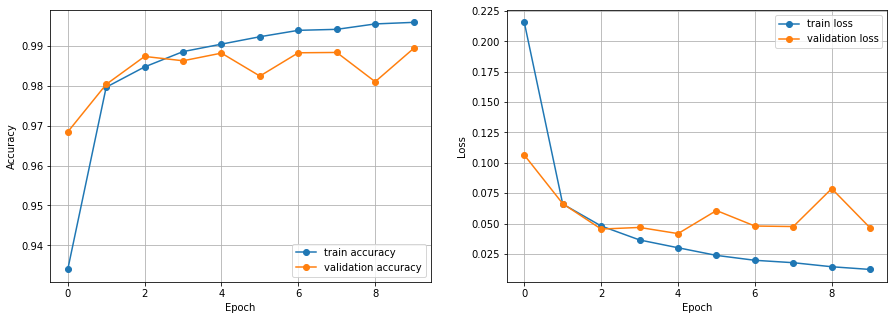

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

# Testing and Evaluating Model


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0386 - accuracy: 0.9910

Test Accuracy: 0.9909999966621399

Test Loss: 0.03857182711362839


# Make Prediction on the Test Images

In [12]:
predictions = model.predict(x_test)

In [13]:
predictions[15]

array([2.5411253e-12, 3.1638286e-11, 2.9169440e-09, 6.5769843e-09,
       8.1742360e-13, 9.9999976e-01, 2.3981158e-07, 2.5475788e-09,
       1.3987078e-10, 8.4646274e-12], dtype=float32)

In [14]:
np.argmax(predictions[15])

5

#Reshape the images again to display original form of images

In [15]:

x_train=x_train=x_train.reshape(-1,28,28)
x_test=x_test=x_test.reshape(-1,28,28)

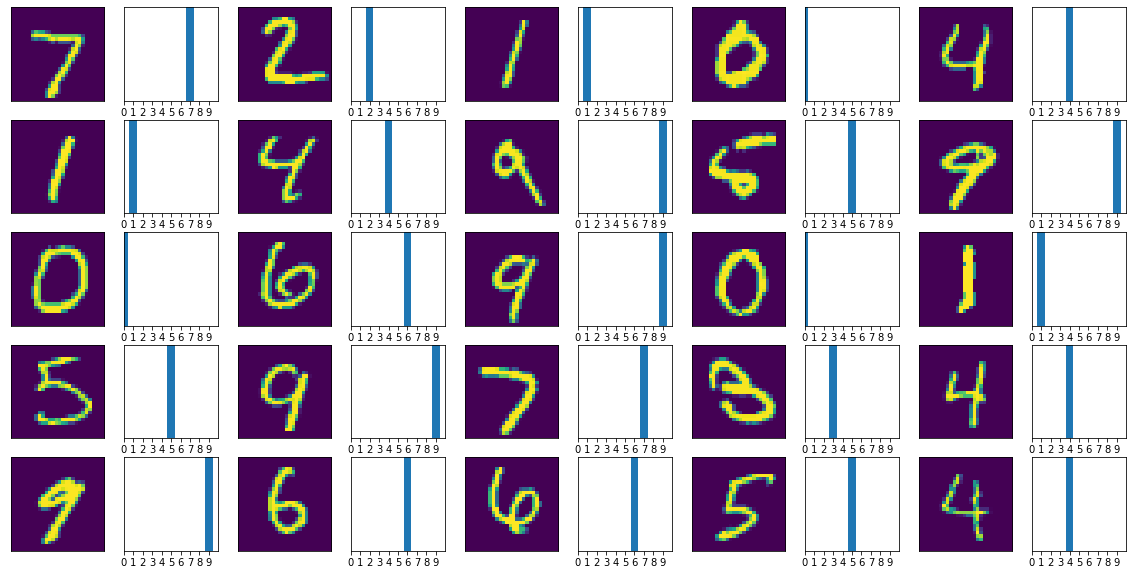

In [ ]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(x_test[i])
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()
